In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Advertisement.csv')

In [4]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [5]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


Comment -
count is same in all so no fissing data.

There is lot difference between 75 th percentile and max in newspaper. So there is possibility of outliers.

TV Column has huge standard deviation so data is possibly spread.
Minimum value of radio is zero so we get unique data point where we can analyze sales just based on TV and Newspaper.


<AxesSubplot:>

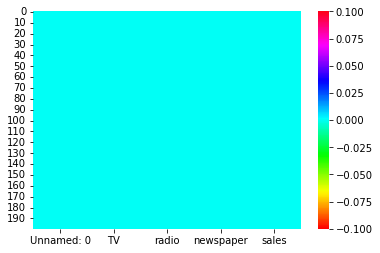

In [6]:
sns.heatmap(df.isnull(),cmap='hsv')

# Univariate Analysis

<AxesSubplot:xlabel='TV', ylabel='sales'>

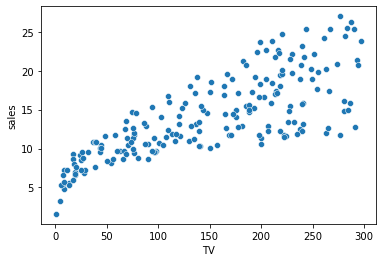

In [9]:
sns.scatterplot(x='TV',y='sales',data=df)

<AxesSubplot:xlabel='radio', ylabel='sales'>

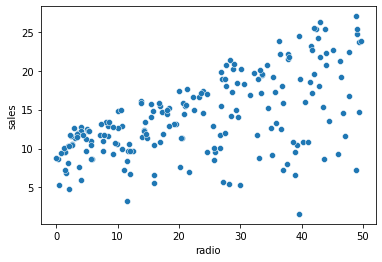

In [11]:
sns.scatterplot(x='radio',y='sales',data=df)

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

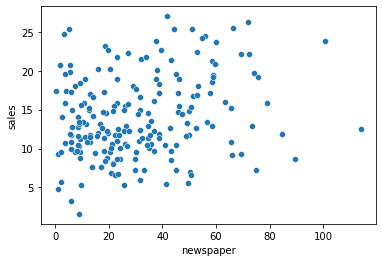

In [12]:
sns.scatterplot(x='newspaper',y='sales',data=df)

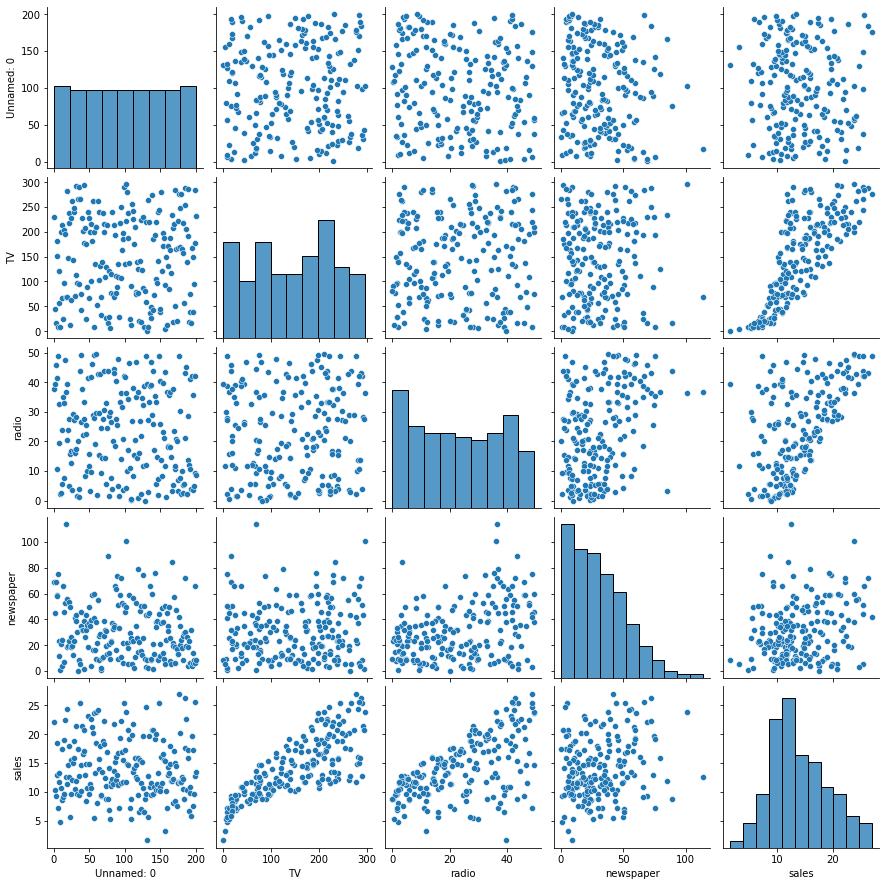

In [13]:
sns.pairplot(df)

In [14]:
## dropping unnamed column as it is of no use
df.drop('Unnamed: 0',axis=1,inplace=True)

In [15]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


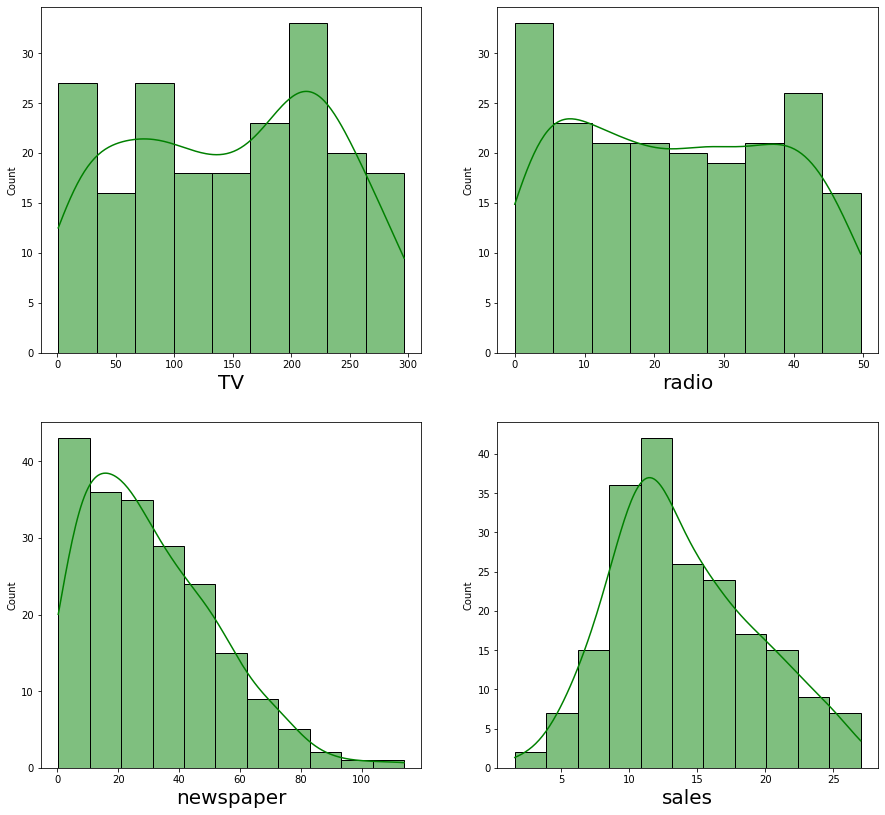

In [16]:
plt.figure(figsize=(15,14), facecolor='white')
plotnumber =1
for column in df:
    if plotnumber <=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.histplot(df[column],color ='g', kde=True)
        plt.xlabel(column,fontsize=20)
        plotnumber +=1
plt.show()

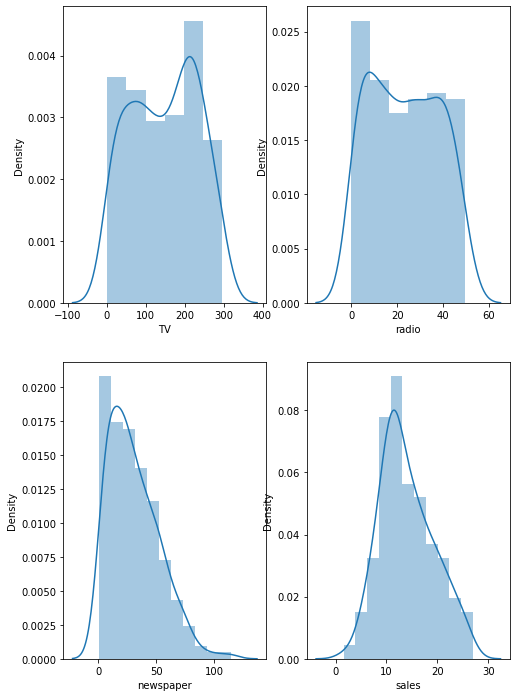

In [17]:
plt.figure(figsize=(8,12))
plotnumber=1
for column in df:
    if plotnumber <= 4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df[column])
    plotnumber+= 1
plt.show()

# Multivariate Analysis

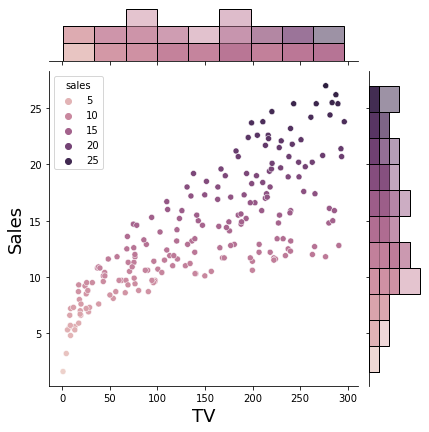

In [19]:
t= sns.JointGrid(data=df, x='TV', y='sales',hue='sales')
t.plot(sns.scatterplot, sns.histplot, color='r')
t.set_axis_labels(xlabel='TV', ylabel='Sales', fontsize=18)

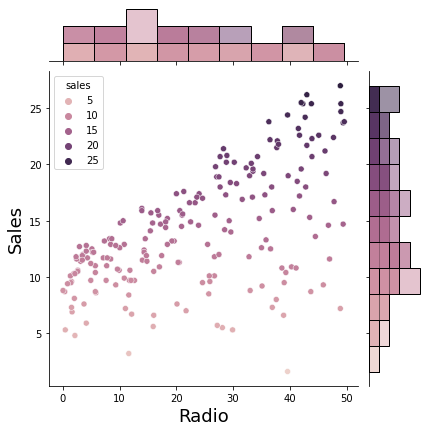

In [20]:
r= sns.JointGrid(data=df, x='radio',y='sales', hue='sales')
r.plot(sns.scatterplot, sns.histplot,color='r')
r.set_axis_labels(xlabel='Radio',ylabel='Sales', fontsize=18)

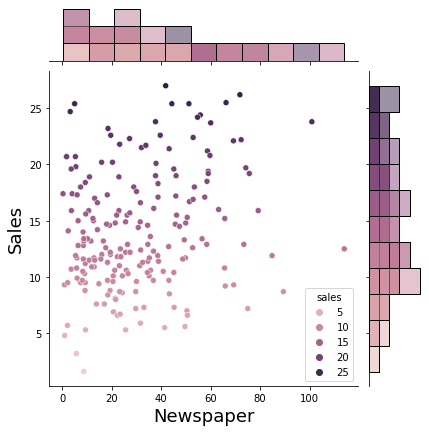

In [21]:
sns.set_palette("hsv", 8)
n= sns.JointGrid(data=df, x='newspaper', y='sales', hue='sales')
n.plot(sns.scatterplot, sns.histplot, color='r')
n.set_axis_labels(xlabel='Newspaper', ylabel='Sales', fontsize=18)

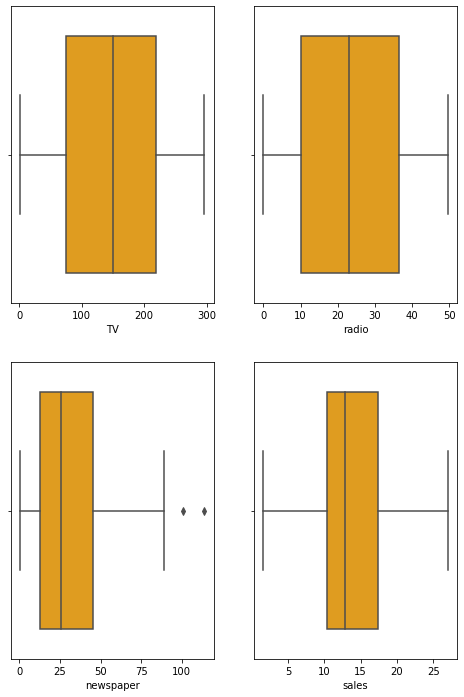

In [22]:
plt.figure(figsize=(8,12))
plotnumber=1
for column in df:
    if plotnumber <= 4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[column])
    plotnumber += 1
plt.show()

# Correlation

In [23]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


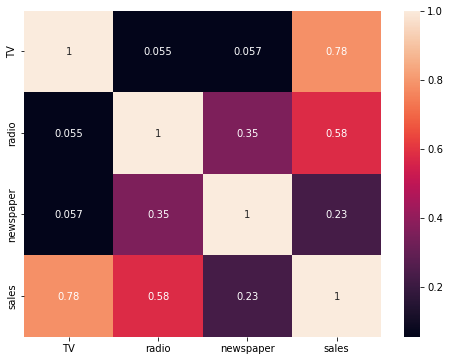

In [24]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

As we can see from the pairplot and the heatmap, the variable TV seems to be most correlated with Sales

# Outliers Detection basesd on IQR

In [25]:
df2=df.copy()
Q1=df2.quantile(0.25)
Q3=df2.quantile(0.75)
IQR=Q3-Q1
print(IQR)

TV           144.450
radio         26.550
newspaper     32.350
sales          7.025
dtype: float64


In [26]:
df_new=df2[~((df <(Q1 -1.5 * IQR)) | (df > (Q3 + 1.5*IQR))).any(axis=1)]
df_new.shape

(198, 4)

In [27]:
print('Percentage Loss :',(((200-198)/200)*100),"%")

Percentage Loss : 1.0 %


1% Data loss is acceptable

# Checking Multicollinearity and Skewness

In [28]:
df_new.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

Transforming positive or right skew data using boxcox transformation

In [29]:
from scipy.stats import boxcox
df_new['newspaper']=boxcox(df_new['newspaper'],0.5)
df_new.skew()

TV          -0.082332
radio        0.114842
newspaper   -0.040649
sales        0.407130
dtype: float64

Heatmap of correlation after removing outliers

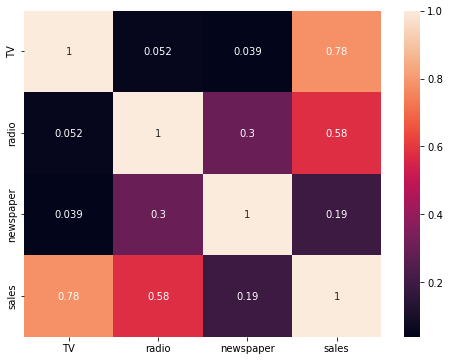

In [30]:
plt.figure(figsize=(8,6))
sns.heatmap(df_new.corr(), annot=True)
plt.show()

Comment -

Correlation of newspaper with others features has decrease after removing outliers and skewness.

Correlation of radio with tv has decrease.

# Checking Multicollinearity between features using variance_inflation_factor

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [32]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(df_new.values,i) for i in range(df_new.shape[1])]
vif['Features']=df_new.columns
vif

,VIF,Features
0,23.370622,TV
1,12.174860,radio
2,4.521733,newspaper
3,58.960569,sales


# Standard Scaling

In [33]:
X=df_new.drop(columns=['sales'])
Y=df_new['sales']

In [34]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
X_scale=Scaler.fit_transform(X)
X_scale

array([[ 9.78697339e-01,  9.89521352e-01,  1.63669060e+00],
       [-1.19901165e+00,  1.09070498e+00,  8.24807889e-01],
       [-1.51933199e+00,  1.53591293e+00,  1.63973373e+00],
       [ 5.64563564e-02,  1.22561648e+00,  1.29728802e+00],
       [ 4.00243389e-01, -8.31783915e-01,  1.29397566e+00],
       [-1.61906543e+00,  1.73828018e+00,  1.80970327e+00],
       [-1.04647815e+00,  6.52242599e-01, -1.21277595e-01],
       [-3.10797368e-01, -2.38173309e-01, -8.51517342e-01],
       [-1.62023876e+00, -1.41864895e+00, -2.07003868e+00],
       [ 6.23176960e-01, -1.38492107e+00, -2.44520695e-01],
       [-9.45571378e-01, -1.16906267e+00, -8.49785485e-02],
       [ 7.98003813e-01,  5.86319933e-02, -1.56356175e+00],
       [-1.44189191e+00,  8.07390825e-01,  1.53500409e+00],
       [-5.77144318e-01, -1.04764232e+00, -1.21749539e+00],
       [ 6.73630347e-01,  6.58988174e-01,  8.58578063e-01],
       [ 5.71550238e-01,  1.65733328e+00,  1.10721196e+00],
       [ 1.58061798e+00,  1.11094170e+00

# Machine Learning Model Building

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso

In [42]:
from xgboost import XGBRegressor

In [43]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scale,Y,random_state=58, test_size=.27)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (144, 3)
Training target vector size: (144,)
Test feature matrix size: (54, 3)
Test target vector size: (54,)


# Finding Best Random state

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,250):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.3)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.9378126888916722 on Random_state 203


# Linear Regression : Base model

In [46]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scale,Y,random_state=201,test_size=.27)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('Predicted sales:','\n',y_pred)
print('\n')
print('Actual sales:','\n',Y_test)

Predicted sales: 
 [12.72003673 21.24861136 15.06683017 20.54651609 13.95395155 18.27894387
 21.66105085 14.53863921 12.66285294 23.05479476 10.20005605 16.25963334
 10.2549324  18.98603326 16.00673409 10.82722752  9.27254962 18.5464619
 15.13268462 12.22239538 19.92601728  7.37564191 17.1994236   6.45612861
  8.97597873 10.64567964 19.10681138  8.64582087 11.90776942 19.18500743
  6.22441457 13.87467898  5.31477991 20.41238026 13.02467678  9.82345856
 24.12948817  7.51165811 11.12195148  6.51149734 12.19789461  6.81379217
  4.53401839 15.62464654 16.04053434 13.4003796   7.34081976 11.95418192
 17.88630876 21.55070766 21.3081643  14.6573705  10.67819565 15.8005435 ]


Actual sales: 
 5       7.2
55     23.7
45     14.9
84     21.7
19     14.6
150    16.1
58     23.8
103    14.7
50     11.4
147    25.4
82     11.3
40     16.6
94     11.5
139    20.7
194    17.3
12      9.2
29     10.5
68     18.9
154    15.6
179    12.6
53     21.2
34      9.5
41     17.1
127     8.8
46     10.6
71    

# Linear Regression Evaluation Matrix

In [47]:
print('Error :')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('R2 Score :')
print(r2_score(Y_test,y_pred))

Error :
Mean absolute error : 1.4462091152579033
Mean squared error : 3.1761951732571543
Root Mean Squared Error: 1.7821883102683493


R2 Score :
0.8976339076679104


# n_neighbors for KNN Regressor

In [48]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 2.0220543275846237
RMSE value for k=  2 is: 1.436285719022043
RMSE value for k=  3 is: 1.3418554809245453
RMSE value for k=  4 is: 1.361193308175669
RMSE value for k=  5 is: 1.3072929338196606
RMSE value for k=  6 is: 1.319599406104971
RMSE value for k=  7 is: 1.4122252640860995
RMSE value for k=  8 is: 1.4536551949915517
RMSE value for k=  9 is: 1.5476082997561647
RMSE value for k=  10 is: 1.594361012141553
RMSE value for k=  11 is: 1.6628533050669332
RMSE value for k=  12 is: 1.724309517678657
RMSE value for k=  13 is: 1.7970554482329333
RMSE value for k=  14 is: 1.8693319468295728
RMSE value for k=  15 is: 1.9020584474322968
RMSE value for k=  16 is: 1.9828388812344748
RMSE value for k=  17 is: 2.0009992057346655
RMSE value for k=  18 is: 2.009177190108642
RMSE value for k=  19 is: 2.0440459970767755
RMSE value for k=  20 is: 2.0528839244846284


Comment-

At k= 5, we get the minimum RMSE value which approximately 1.3072929338196606, shoots up on further increasing the k value. We can safely say that k=3 will give us the best result in this case



# Applying other Regression Model

In [49]:
rf = RandomForestRegressor(n_estimators = 100 )
svr=SVR()
dtc = DecisionTreeRegressor()
adb=AdaBoostRegressor()
gradb=GradientBoostingRegressor()
knn=KNeighborsRegressor(n_neighbors=16)
xgb=XGBRegressor()
model=[rf,svr,dtc,adb,gradb,knn,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print(' Error of ', m, ':')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('R2 Score :')
    print(r2_score(Y_test,y_pred)) 
    print('\n')
    print('==============================================================================================================')



 Error of  RandomForestRegressor() :
Mean absolute error : 0.6388148148148156
Mean squared error : 0.6700715185185163
Root Mean Squared Error: 0.8185789629098199


R2 Score :
0.9784041599485749




 Error of  SVR() :
Mean absolute error : 1.1413215188107266
Mean squared error : 3.348070825680137
Root Mean Squared Error: 1.8297734356144033


R2 Score :
0.8920945003123081




 Error of  DecisionTreeRegressor() :
Mean absolute error : 0.855555555555556
Mean squared error : 1.2540740740740746
Root Mean Squared Error: 1.1198544879019214


R2 Score :
0.9595822500018789




 Error of  AdaBoostRegressor() :
Mean absolute error : 0.9074031824259355
Mean squared error : 1.3672510693038338
Root Mean Squared Error: 1.1692951164286258


R2 Score :
0.9559346508741222




 Error of  GradientBoostingRegressor() :
Mean absolute error : 0.4596798736839456
Mean squared error : 0.3545702064651658
Root Mean Squared Error: 0.5954579804362066


R2 Score :
0.9885725012118823




 Error of  KNeighborsRegress

Here we can see that GradientBoostingRegressor() algorithm gives maximum R2 score :0.9885725012118823, Minimum Root Mean Squared Error: 0.5954579804362066

# Cross Validation

In [50]:
from sklearn.model_selection import cross_val_score
model = [lin_reg,rf,svr,dtc,adb,gradb,knn,xgb]
for m in model:
    score = cross_val_score(m, X, Y, cv =4)
    print('\n')
    print('Cross Validation Score :',m,":",'\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('R2 Score :')
    print(r2_score(Y_test,y_pred))
    print('\n')
    print('==============================================================================================================')



Cross Validation Score : LinearRegression() : 

Score : [0.88773334 0.91453399 0.84871665 0.90260192]
Mean Score : 0.8883964730592853
Std deviation : 0.024798654017717053


R2 Score :
0.9879661399780325




Cross Validation Score : RandomForestRegressor() : 

Score : [0.9776008  0.98135617 0.97256277 0.97654192]
Mean Score : 0.9770154132892516
Std deviation : 0.0031318948763505226


R2 Score :
0.9879661399780325




Cross Validation Score : SVR() : 

Score : [0.83403109 0.80827576 0.85366538 0.77893763]
Mean Score : 0.818727463665703
Std deviation : 0.028050525227050354


R2 Score :
0.9879661399780325




Cross Validation Score : DecisionTreeRegressor() : 

Score : [0.95495453 0.95376805 0.93968034 0.91944659]
Mean Score : 0.9419623764065901
Std deviation : 0.014320776831211019


R2 Score :
0.9879661399780325




Cross Validation Score : AdaBoostRegressor() : 

Score : [0.9512961  0.9649724  0.95389205 0.95054151]
Mean Score : 0.955175515526276
Std deviation : 0.005791160449545785




From above cross validattion, we can see that Gradient Boosting Regressor() gives us maximum R2 score(0.9879661399780325), maximum mean score of 0.9792455624211265. So we will apply Hyperparameter tuning on Gradient Boosting Regressor

# Hyper Parameter Tuning : GridSearchCV

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
parameters = [{    'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.7,0.5, 0.3, 0.1],
                  'n_estimators' : [100,250,500,750],
                  'max_depth'    : [4,6,8,10]}]

In [53]:
GCV = GridSearchCV(GradientBoostingRegressor(),parameters,cv=4,n_jobs = -1, verbose=5)
GCV.fit(X_train,Y_train)

Fitting 4 folds for each of 256 candidates, totalling 1024 fits


GridSearchCV(cv=4, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid=[{'learning_rate': [0.01, 0.02, 0.03, 0.04],
                          'max_depth': [4, 6, 8, 10],
                          'n_estimators': [100, 250, 500, 750],
                          'subsample': [0.7, 0.5, 0.3, 0.1]}],
             verbose=5)

In [54]:
GCV.best_params_

{'learning_rate': 0.04, 'max_depth': 10, 'n_estimators': 750, 'subsample': 0.3}

# Final Model

In [56]:
Final_mod = GradientBoostingRegressor(learning_rate=0.04 ,n_estimators= 750, max_depth=10 ,subsample=0.3)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('Error in Final Model :')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('R2 Score of Final Model :')
print(r2_score(Y_test,y_pred)) 
print('\n')



Error in Final Model :
Mean absolute error : 0.3970829708444828
Mean squared error : 0.2425554179827955
Root Mean Squared Error: 0.49249915531175836


R2 Score of Final Model :
0.9921826433961194




# Saving Model

In [57]:
import joblib
joblib.dump(Final_mod,'Advertising Sales_Final.pkl')

['Advertising Sales_Final.pkl']